In [1]:
import pandas as pd 

df=pd.read_csv('Processed.csv')       

print ("DataFrame shape: ", df.shape)
df.head(5)              

DataFrame shape:  (2028, 39)


,Age,Gender,University,Department,Academic_Year,Current_CGPA,waiver_or_scholarship,PSS1,PSS2,PSS3,...,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,4,3,...,2,3,2,2,2,2,3,2,20,Severe Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,3,4,...,2,2,2,2,2,2,2,2,19,Moderately Severe Depression
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,...,0,0,0,0,0,0,0,0,0,No Depression
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,1,2,...,1,2,1,2,1,2,2,1,14,Moderate Depression
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,4,4,4,...,3,3,3,1,3,0,3,3,20,Severe Depression


In [3]:
# count duplicates and nans
print ("Duplicates: ", df.duplicated().sum())   
if sum(df.isnull().sum()) == 0:
    print ("No nans")
else:
    print ("Nans: ", df.isnull().sum())

# delete duplicates
df.drop_duplicates(inplace=True)

Duplicates:  0
No nans


In [4]:
#saved cleaned data
df.to_csv('Cleaned.csv', index=False)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Remove remaining non-numeric label columns to avoid errors
data_cleaned = df.drop(columns=["Stress Label", "Anxiety Label"])

# Copy original dataframe
df_transformed = df.copy()

# Convert Age ranges to numeric midpoints
age_map = {
    "Below 18": 17,
    "18-22": 20,
    "23-26": 24.5,
    "27-30": 28.5,
    "Above 30": 32
}
df_transformed["Age"] = df_transformed["Age"].map(age_map)

# Convert CGPA ranges to midpoints
cgpa_map = {
    "Below 2.50": 2.25,
    "2.50 - 2.99": 2.75,
    "3.00 - 3.39": 3.20,
    "3.40 - 3.79": 3.60,
    "3.80 - 4.00": 3.90,
    "Other": np.nan
}
df_transformed["Current_CGPA"] = df_transformed["Current_CGPA"].map(cgpa_map)

# Convert Map Academic Year to numeric year
academic_year_map = {
    "First Year or Equivalent": 1,
    "Second Year or Equivalent": 2,
    "Third Year or Equivalent": 3,
    "Fourth Year or Equivalent": 4,
    "Other": 0
}
df_transformed["Academic_Year"] = df_transformed["Academic_Year"].map(academic_year_map)

# Binary encode waiver_or_scholarship
df_transformed["waiver_or_scholarship"] = df_transformed["waiver_or_scholarship"].map({"Yes": 1, "No": 0})

# One-hot encode Gender, University, Department
df_transformed = pd.get_dummies(df_transformed, columns=["Gender", "University", "Department"], drop_first=False)

# Display the transformed dataset structure
print(df_transformed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2022 entries, 0 to 2027
Data columns (total 66 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age                                                                    2022 non-null   float64
 1   Academic_Year                                                          2022 non-null   int64  
 2   Current_CGPA                                                           1851 non-null   float64
 3   waiver_or_scholarship                                                  2022 non-null   int64  
 4   PSS1                                                                   2022 non-null   int64  
 5   PSS2                                                                   2022 non-null   int64  
 6   PSS3                                                                   2022 non-null   int64 

In [5]:
missing = df_transformed.isnull().sum() / df_transformed.shape[0] * 100
missing[missing > 0]

Current_CGPA    8.456973
dtype: float64

In [6]:
df_transformed.rename(columns={"Depression Value": "Depression_Value"}, inplace=True)

In [7]:
df_transformed.select_dtypes(exclude="object").dropna().corr().Current_CGPA.sort_values(ascending=False)

Current_CGPA                                                      1.000000
University_American International University Bangladesh (AIUB)    0.249094
University_Islamic University of Technology (IUT)                 0.182567
PSS8                                                              0.182476
waiver_or_scholarship                                             0.158758
                                                                    ...   
Department_Business and Entrepreneurship Studies                 -0.078195
PHQ6                                                             -0.088108
University_North South University (NSU)                          -0.125364
Age                                                              -0.133243
University_Independent University, Bangladesh (IUB)              -0.270198
Name: Current_CGPA, Length: 63, dtype: float64

In [8]:
df_transformed.select_dtypes(exclude="object").dropna().corr().Depression_Value.sort_values(ascending=False)

Depression_Value                                                    1.000000
PHQ2                                                                0.813349
PHQ6                                                                0.802719
Anxiety Value                                                       0.772522
PHQ7                                                                0.761388
                                                                      ...   
University_American International University Bangladesh (AIUB)     -0.084162
University_Dhaka University of Engineering and Technology (DUET)   -0.110378
PSS6                                                               -0.114361
Gender_Male                                                        -0.120098
PSS8                                                               -0.136006
Name: Depression_Value, Length: 63, dtype: float64

In [9]:
# Drop all one-hot encoded university columns from df_transformed
university_cols = [col for col in df_transformed.columns if col.startswith("University_")]
df_transformed.drop(columns=university_cols, inplace=True)

# Confirm removal
"University_BRAC University" in df_transformed.columns, len(university_cols)


(False, 15)

In [10]:
df_transformed.shape
#now we code a line to display all the columns names
df_transformed.columns

Index(['Age', 'Academic_Year', 'Current_CGPA', 'waiver_or_scholarship', 'PSS1',
       'PSS2', 'PSS3', 'PSS4', 'PSS5', 'PSS6', 'PSS7', 'PSS8', 'PSS9', 'PSS10',
       'Stress Value', 'Stress Label', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5',
       'GAD6', 'GAD7', 'Anxiety Value', 'Anxiety Label', 'PHQ1', 'PHQ2',
       'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'PHQ9',
       'Depression_Value', 'Depression Label', 'Gender_Female', 'Gender_Male',
       'Gender_Prefer not to say', 'Department_Biological Sciences',
       'Department_Business and Entrepreneurship Studies',
       'Department_Engineering - CS / CSE / CSC / Similar to CS',
       'Department_Engineering - Civil Engineering / Similar to CE',
       'Department_Engineering - EEE/ ECE / Similar to EEE',
       'Department_Engineering - Mechanical Engineering / Similar to ME',
       'Department_Engineering - Other',
       'Department_Environmental and Life Sciences',
       'Department_Law and Human Rights',
       'Depa

In [11]:
df_transformed.columns= df_transformed.columns.str.replace(" ", "_")
df_transformed.columns

Index(['Age', 'Academic_Year', 'Current_CGPA', 'waiver_or_scholarship', 'PSS1',
       'PSS2', 'PSS3', 'PSS4', 'PSS5', 'PSS6', 'PSS7', 'PSS8', 'PSS9', 'PSS10',
       'Stress_Value', 'Stress_Label', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5',
       'GAD6', 'GAD7', 'Anxiety_Value', 'Anxiety_Label', 'PHQ1', 'PHQ2',
       'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'PHQ9',
       'Depression_Value', 'Depression_Label', 'Gender_Female', 'Gender_Male',
       'Gender_Prefer_not_to_say', 'Department_Biological_Sciences',
       'Department_Business_and_Entrepreneurship_Studies',
       'Department_Engineering_-_CS_/_CSE_/_CSC_/_Similar_to_CS',
       'Department_Engineering_-_Civil_Engineering_/_Similar_to_CE',
       'Department_Engineering_-_EEE/_ECE_/_Similar_to_EEE',
       'Department_Engineering_-_Mechanical_Engineering_/_Similar_to_ME',
       'Department_Engineering_-_Other',
       'Department_Environmental_and_Life_Sciences',
       'Department_Law_and_Human_Rights',
       'Depa

In [12]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2022 entries, 0 to 2027
Data columns (total 51 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Age                                                              2022 non-null   float64
 1   Academic_Year                                                    2022 non-null   int64  
 2   Current_CGPA                                                     1851 non-null   float64
 3   waiver_or_scholarship                                            2022 non-null   int64  
 4   PSS1                                                             2022 non-null   int64  
 5   PSS2                                                             2022 non-null   int64  
 6   PSS3                                                             2022 non-null   int64  
 7   PSS4                                           

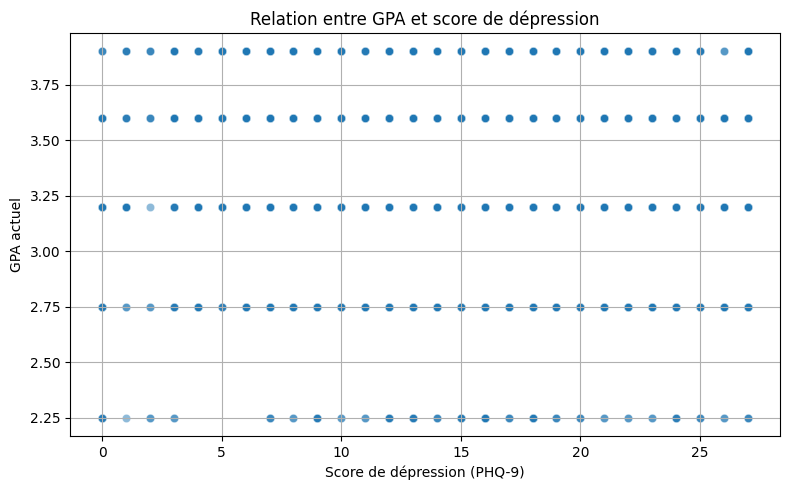

In [13]:
# Re-import necessary libraries after environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 1. Correlation check between GPA and Depression_Value
correlation = df_transformed[["Current_CGPA", "Depression_Value"]].dropna().corr()

# 2. Visualize relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_transformed, x="Depression_Value", y="Current_CGPA", alpha=0.5)
plt.title("Relation entre GPA et score de dépression")
plt.xlabel("Score de dépression (PHQ-9)")
plt.ylabel("GPA actuel")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Train regression model on available CGPA data
df_gpa_known = df_transformed[df_transformed["Current_CGPA"].notna()]
X_train = df_gpa_known[["Depression_Value"]]
y_train = df_gpa_known["Current_CGPA"]

gpa_model = LinearRegression()
gpa_model.fit(X_train, y_train)

# 4. Predict missing CGPA values
df_missing_gpa = df_transformed[df_transformed["Current_CGPA"].isna()]
predicted_gpas = gpa_model.predict(df_missing_gpa[["Depression_Value"]])

# 5. Fill in the missing CGPAs
df_transformed.loc[df_transformed["Current_CGPA"].isna(), "Current_CGPA"] = predicted_gpas


In [14]:
df_transformed['Current_CGPA'].info()

<class 'pandas.core.series.Series'>
Index: 2022 entries, 0 to 2027
Series name: Current_CGPA
Non-Null Count  Dtype  
--------------  -----  
2022 non-null   float64
dtypes: float64(1)
memory usage: 31.6 KB


In [15]:
# save the transformed data
df_transformed.to_csv('Cleaned_Final.csv', index=False)